In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Reading From Dataset

In [3]:
# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


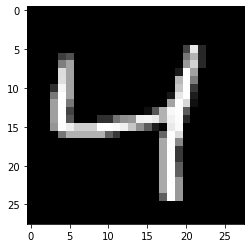

In [4]:
show_image(train_set[2][0])
print(train_set[2][1])
plt.show()

# Feed Forward

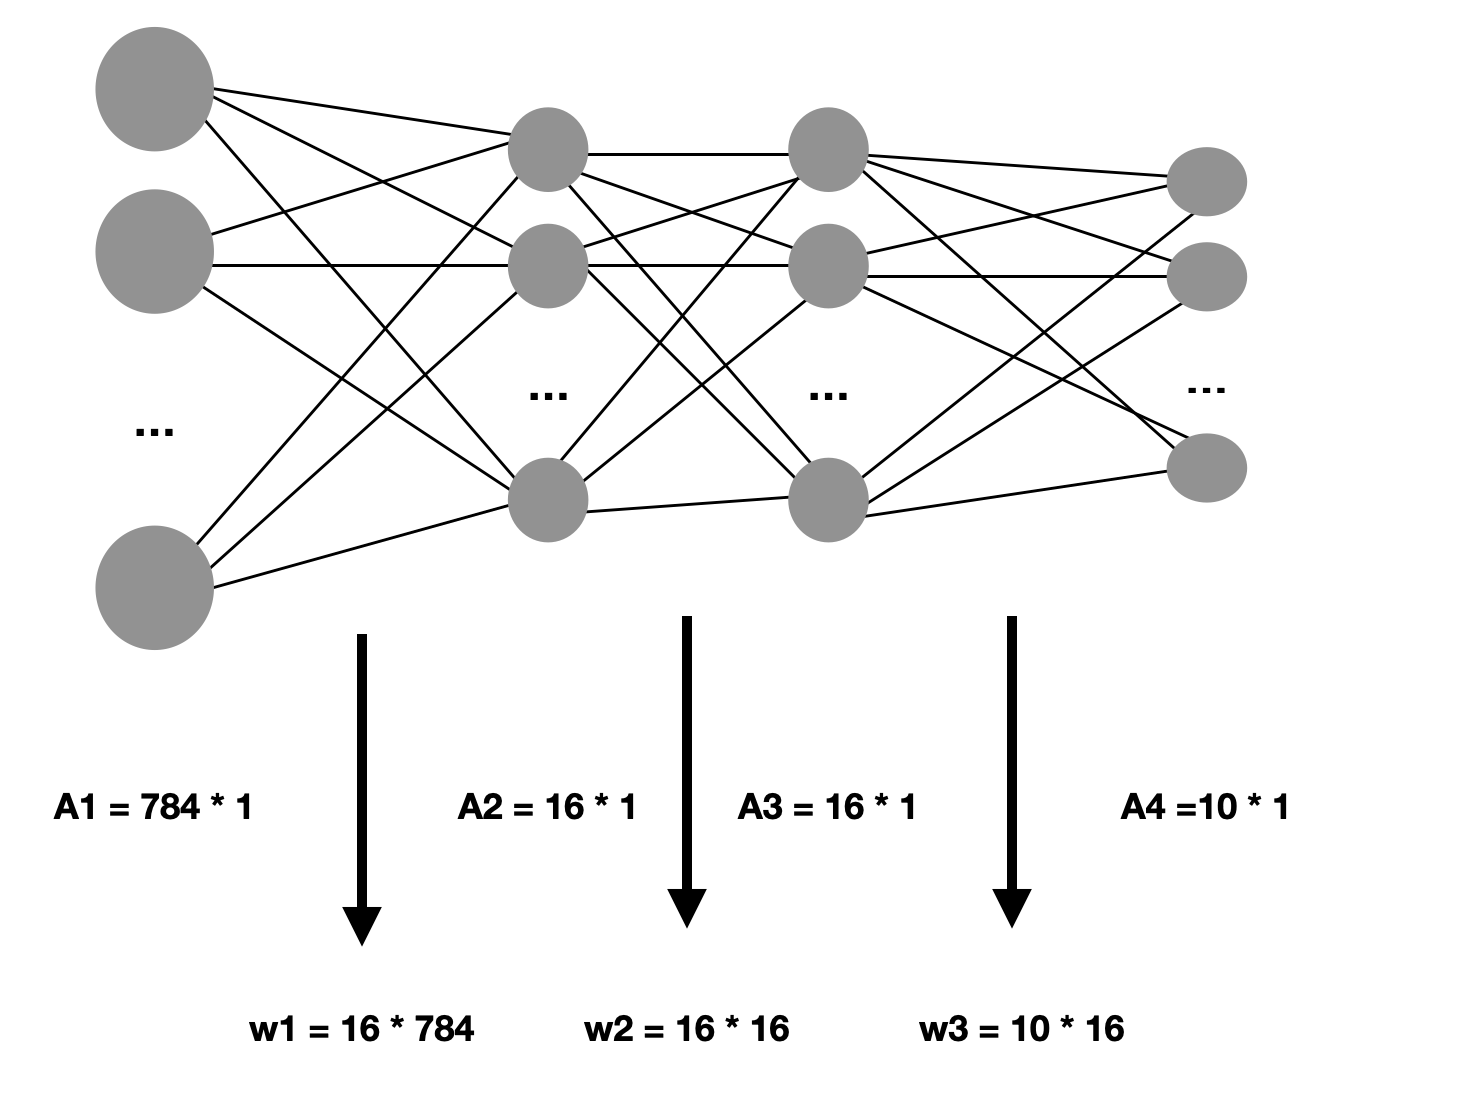

In [5]:
Image(filename = "jupyter-images/neural-networks.png", width = 600, height = 600)

In [6]:
w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))

count = 0
for i in range(100):
    a1 = train_set[i][0]
    a2 = sigmoid(w1 @ a1 + b1)
    a3 = sigmoid(w2 @ a2 + b2)
    a4 = sigmoid(w3 @ a3 + b3)
    
    index = np.where(a4 == np.amax(a4))
#     print(index[0][0])
#     print(np.where(train_set[i][1] == np.amax(train_set[i][1]))[0][0])
    
    if index[0][0] == np.where(train_set[i][1] == np.amax(train_set[i][1]))[0][0]:
        count += 1
    
print(count/100)

0.07


# Backpropagation

In [7]:
number_of_epochs = 20
learning_rate = 1
batch_size = 10

In [8]:
%%time
batches = []
costs_array = []

for i in range(0, 100, batch_size):
    batches.append(train_set[i : i + batch_size])
    

w1 = np.zeros((16,784))
w2 = np.zeros((16,16))
w3 = np.zeros((10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        for data in batch:
            image = data[0]
            label = data[1]
            a2 = sigmoid(w1 @ image + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            a4 = sigmoid(w3 @ a3 + b3)


            # layer 4-3
            for i in range(10):
                for j in range(16):
                    grad_w3[i, j] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * a3[j, 0]

            for i in range(10):
                    grad_b3[i, 0] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * 1


            # layer 3-2

            # activation
            activation_3 = np.zeros((16,1))

            for j in range(16):
                for i in range(10):
                    activation_3[j, 0] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * w3[i, j]


            for j in range(16):
                for k in range(16):
                    grad_w2[j , k] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * a2[k, 0]


            for j in range(10):
                grad_b2[j , 0] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * 1



            # layer 2-1

            # activation
            activation_2 = np.zeros((16,1))

            for k in range(16):
                for j in range(16):
                    activation_2[k, 0] += activation_3[j, 0] * sigmoid_derivative(a3[j, 0]) * w2[j, k]


            for k in range(16):
                for m in range(784):
                    grad_w1[k , m] += activation_2[k, 0] * sigmoid_derivative(a2[k, 0]) * image[m, 0]


            for k in range(16):
                grad_b1[k , 0] += activation_2[k, 0] * sigmoid_derivative(a2[k, 0]) * 1



        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    cost = 0
    for i in range(100):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
        
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
        
    cost = cost / 100
    costs_array.append(cost)
     

CPU times: user 1min 35s, sys: 12.4 s, total: 1min 47s
Wall time: 27.1 s


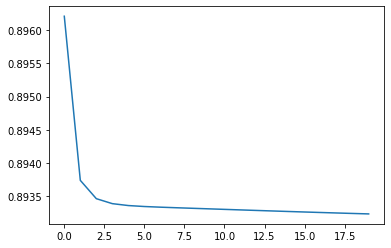

In [9]:
plt.plot([x for x in range(20)], costs_array)

# Vectorization

In [36]:
%%time
batches = []
costs_array = []

for i in range(0, 100, batch_size):
    batches.append(train_set[i : i + batch_size])
    

w1 = np.random.normal(size=(16,784))
w2 = np.random.normal(size=(16,16))
w3 = np.random.normal(size=(10,16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((10,1))
        

for epoch in range(number_of_epochs):
    for batch in batches:
        
        grad_w1 = np.zeros((16,784))
        grad_w2 = np.zeros((16,16))
        grad_w3 = np.zeros((10,16))

        grad_b1 = np.zeros((16,1))
        grad_b2 = np.zeros((16,1))
        grad_b3 = np.zeros((10,1))

        for data in batch:
            image = data[0]
            label = data[1]
            a2 = sigmoid(w1 @ image + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            a4 = sigmoid(w3 @ a3 + b3)
            
            # layer 4-3
                    
            grad_w3 += sigmoid_derivative(a4) * (2 * (a4 - label)) @ np.transpose(a3)
                        
            grad_b3 += 2 * sigmoid_derivative(a4) * (a4 - label)


            # layer 3-2

            activation_3 = np.zeros((16,1))

            for j in range(16):
                for i in range(10):
                    activation_3[j, 0] += (2 * a4[i, 0] - 2 * label[i, 0]) * sigmoid_derivative(a4[i, 0]) * w3[i, j]


#             activation_3 += np.transpose(w3) @ sigmoid_derivative(a4) * (2 * (a4 - label))

            grad_w2 += sigmoid_derivative(a3) * activation_3 @ np.transpose(a2)

            grad_b2 += sigmoid_derivative(a3) * activation_3



            # layer 2-1

            activation_2 = np.zeros((16,1))
            activation_2 += np.transpose(w2) @ sigmoid_derivative(a3) * activation_3

            grad_w1 += sigmoid_derivative(a2) * activation_2 @ np.transpose(image)

            grad_b1 += sigmoid_derivative(a2) * activation_2



        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))

        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
    
    
    
    cost = 0
    for i in range(100):
        a1 = train_set[i][0]
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        a4 = sigmoid(w3 @ a3 + b3)
        
        for j in range(10):
            cost += np.power(a4[j, 0] - train_set[i][1][j, 0], 2)
        
    cost = cost / 100
    costs_array.append(cost)
     

CPU times: user 2.72 s, sys: 500 ms, total: 3.22 s
Wall time: 832 ms


0.5


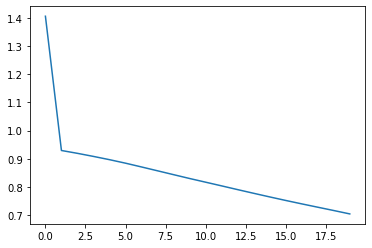

In [38]:
plt.plot([x for x in range(20)], costs_array)


count = 0
for i in range(100):
    a1 = train_set[i][0]
    a2 = sigmoid(w1 @ a1 + b1)
    a3 = sigmoid(w2 @ a2 + b2)
    a4 = sigmoid(w3 @ a3 + b3)
    
    index = np.where(a4 == np.amax(a4))
#     print(index[0][0])
#     print(np.where(train_set[i][1] == np.amax(train_set[i][1]))[0][0])
    
    if index[0][0] == np.where(train_set[i][1] == np.amax(train_set[i][1]))[0][0]:
        count += 1
    
print(count/100)